# <span style="color:red">Seaborn | Part-14: FacetGrid:</span>

Welcome to another lecture on *Seaborn*! Our journey began with assigning *style* and *color* to our plots as per our requirement. Then we moved on to *visualize distribution of a dataset*, and *Linear relationships*, and further we dived into topics covering *plots for Categorical data*. Every now and then, we've also roughly touched customization aspects using underlying Matplotlib code. That indeed is the end of the types of plots offered by Seaborn, and only leaves us with widening the scope of usage of all the plots that we have learnt till now.

Our discussion in upcoming lectures is majorly going to focus on using the core of Seaborn, based on which, *Seaborn* allows us to plot these amazing figures, that we had been detailing previously. This ofcourse isn't going to be a brand new topic because every now & then I have used these in previous lectures but hereon we're going to specifically deal with each one of those.

To introduce our new topic, i.e. **<span style="color:red">Grids</span>**, we shall at first list the options available. Majorly, there are just two aspects to our discussion on *Grids* that includes:
- **<span style="color:red">FacetGrid</span>**
- **<span style="color:red">PairGrid</span>**
Additionally, we also have a companion function for *PairGrid* to enhance execution speed of *PairGrid*, i.e.
- **<span style="color:red">Pairplot</span>**

Our discourse shall detail each one of these topics in-length for better understanding. As we have already covered the statistical inference of each type of plot, our emphasis shall mostly be on scaling and parameter variety of known plots on these grids. So let us commence our journey with **FacetGrid** in this lecture.

## <span style="color:red">FacetGrid:</span>

The term **Facet** here refers to *a dimension* or say, an *aspect* or a feature of a *multi-dimensional dataset*. This analysis is extremely useful when working with a multi-variate dataset which has a varied blend of datatypes, specially in *Data Science* & *Machine Learning* domain, where generally you would be dealing with huge datasets. If you're a *working pofessional*, you know what I am talking about. And if you're a *fresher* or a *student*, just to give you an idea, in this era of *Big Data*, an average *CSV file* (which is generally the most common form), or even a RDBMS size would vary from Gigabytes to Terabytes of data. If you are dealing with *Image/Video/Audio datasets*, then you may easily expect those to be in *hundreds of gigabyte*.

On the other hand, the term **Grid** refers to any *framework with spaced bars that are parallel to or cross each other, to form a series of squares or rectangles*. Statistically, these *Grids* are also used to represent and understand an entire *population* or just a *sample space* out of it. In general, these are pretty powerful tool for presentation, to describe our dataset and to study the *interrelationship*, or *correlation* between *each facet* of any *environment*.

To kill our curiousity, let us plot a simple **<span style="color:red">FacetGrid</span>** before continuing on with our discussion. And to do that, we shall once again quickly import our package dependencies and set the aesthetics for future use with built-in datasets.

In [46]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="rocket")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

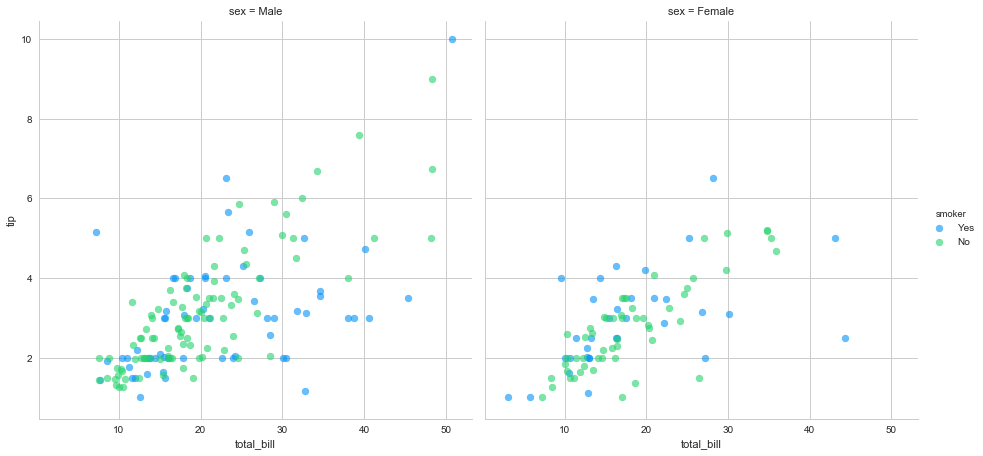

In [54]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

# Plotting a basic FacetGrid with Scatterplot representation:
ax = sns.FacetGrid(tips, col="sex", hue="smoker", size=6.5)
ax.map(plt.scatter, "total_bill", "tip", alpha=.6)
ax.add_legend()

This is a combined scatter representation of Tips dataset that we have seen earlier as well, where Total tip generated against Total Bill amount is drawn in accordance with their Gender and Smoking practice. With this we can conclude how **FacetGrid** helps us visualize distribution of a variable or the relationship between multiple variables separately within subsets of our dataset. Important to note here is that Seaborn FacetGrid can only support upto **3-Dimensional figures**, using `row`, `column` and `hue` dimensions of the grid for *Categorical* and *Discrete* variables within our dataset.

Let us now have a look at the *parameters* offered or supported by Seaborn for a **FacetGrid**:
`seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, size=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None`

There seems to be few new parameters out here for us, so let us one-by-one understand their scope before we start experimenting with those on our plots:
- We are well acquainted with mandatory `data`, `row`, `col` and `hue` parameters.
- Next is `col_wrap` that defines the **width of our variable** selected as `col` dimension, so that the *column facets* can  span multiple rows.
- `sharex` helps us **draft dedicated Y-axis** for each sub-plot, if declared `False`. Same concept holds good for `sharey` as well.
- `size` helps us determine the size of our grid-frame.
- We may also declare `hue_kws` parameter that lets us **control other aesthetics** of our plot.
- `dropna` drops all the **NULL variables** from the selected features; and `legend_out` places the Legend either inside or outside our plot, as we've already seen.
- `margin_titles` fetch the **feature names** from our dataset; and `xlim` & `ylim` additionally offers Matplotlib style limitation to each of our axes on the grid.

That pretty much seems to cover *intrinsic parameters* so let us now try to use them one-by-one with slight modifications:

Let us begin by pulling the *Legend inside* our FacetGrid and *creating a Header* for our grid:

Text(0.5,0.98,'Tip Collection based on Gender and Smoking')

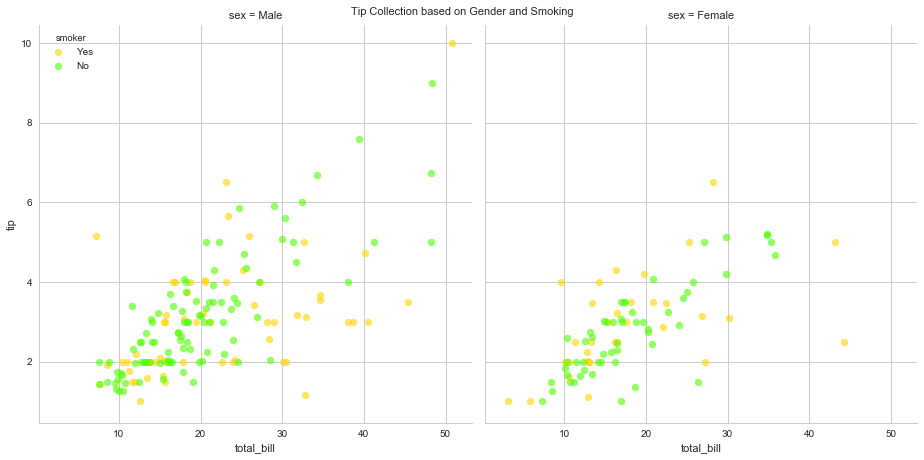

In [59]:
ax = sns.FacetGrid(tips, col="sex", hue="smoker", size=6.5, legend_out=False)
ax.map(plt.scatter, "total_bill", "tip", alpha=.6)
ax.add_legend()

plt.suptitle('Tip Collection based on Gender and Smoking', fontsize=11)

So declaring `legend_out` as `False` and creating a **Superhead title** using *Matplotlib* seems to be working great on our Grid. Customization on *Header size* gives us an add-on capability as well. Right now, we are going by default `palette` for **marker colors** which can be customized by setting to a different one. Let us try other parameters as well: 

Actually, before we jump further into utilization of other parameters, let me quickly take you behind the curtain of this plot. As visible, we assigned `ax` as a variable to our **FacetGrid** for creating a visualizaion figure, and then plotted a **Scatterplot** on top of it, before decorating further with a *Legend* and a *Super Title*. So when we initialized the assignment of `ax`, the grid actually gets created using backend *Matplotlib figure and axes*, though doesn't plot anything on top of it. This is when we call Scatterplot on our sample data, that in turn at the backend calls `FacetGrid.map()` function to map this grid to our Scatterplot. We intended to draw a linear relation plot, and thus entered multiple variable names, i.e. `Total Bill` and associated `Tip` to form *facets*, or dimensions of our grid.

Also important to note is the use the [matplotlib.pyplot.gca()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html) function, if required to *set the current axes* on our Grid. This shall fetch the current Axes instance on our current figure matching the given keyword arguments or params, & if unavailable, it shall even create one.

In [2]:
# Let us create a dummy DataFrame:
football = pd.DataFrame({
        "Wins": [76, 64, 38, 78, 63, 45, 32, 46, 13, 40, 59, 80],
        "Loss": [55, 67, 70, 56, 59, 69, 72, 24, 45, 21, 58, 22],
        "Team": ["Arsenal"] * 4 + ["Liverpool"] * 4 + ["Chelsea"] * 4,
        "Year": ["2015", "2016", "2017", "2018"] * 3})

Before I begin illustration using this DataFrame, on a lighter note, I would add a disclosure that this is a dummy dataset and holds no resemblance whatsoever to actual records of respective Soccer clubs. So if you're one among those die-hard fans of any of these clubs, kindly excuse me if the numbers don't tally, as they are all fabricated.

Here, **football** is kind of a *Time-series Pandas DataFrame* that in entirety reflects 4 features, where `Wins` and `Loss` variables represent the quarterly Scorecard of three soccer `Teams` for last four `Years`, from 2015 to 2018. Let us check how this DataFrame looks like:

In [3]:
football

,Loss,Team,Wins,Year
0,55,Arsenal,76,2015
1,67,Arsenal,64,2016
2,70,Arsenal,38,2017
3,56,Arsenal,78,2018
4,59,Liverpool,63,2015
5,69,Liverpool,45,2016
6,72,Liverpool,32,2017
7,24,Liverpool,46,2018
8,45,Chelsea,13,2015
9,21,Chelsea,40,2016


This looks pretty good for our purpose so now let us initialize our FacetGrid on top of it and try to obtain a time-indexed with further plotting. In production environment, to keep our solution scalable, this is generally done by defining a function for data manipulation so we shall try that in this example:

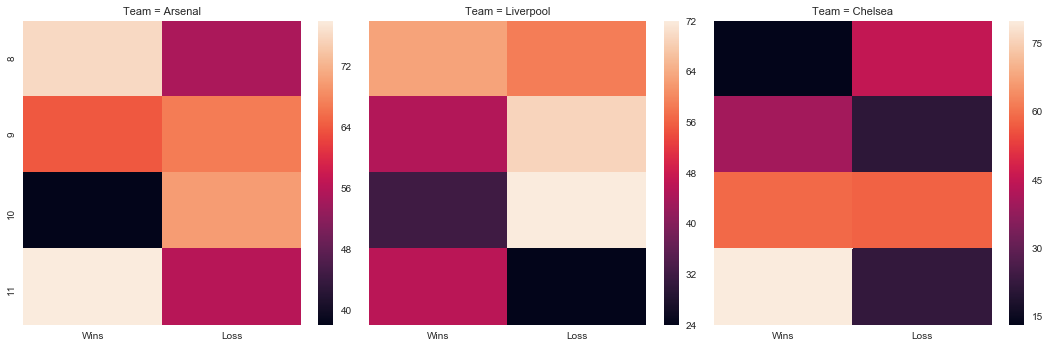

In [39]:
# Defining a customizable function to be precise with our requirements & shall discuss it a little later:
# We shall be using a new type of plot here that I shall discuss in detail later on.
def football_plot(data, color):
    sns.heatmap(data[["Wins", "Loss"]])

# 'margin_titles' won't necessarily guarantee desired results so better to be cautious:
ax = sns.FacetGrid(football, col="Team", size=5, margin_titles=True)
ax.map_dataframe(football_plot)

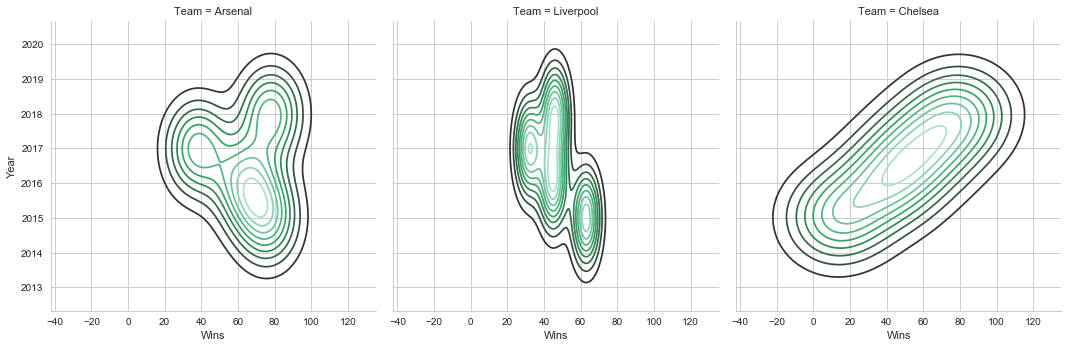

In [64]:
ax = sns.FacetGrid(football, col="Team", size=5)
ax.map(sns.kdeplot, "Wins", "Year", hist=True, lw=2)

As visible, **Heatmap** plots rectangular boxes for data points as a color-encoded matrix, and this is a topic we shall be discussing in detail in another Lecture but for now, I just wanted you to have a preview of it, and hence used it on top of our **FacetGrid**. Another good thing to know with *FacetGrid* is **gridspec** module which allows Matplotlib params to be passed for drawing attention to a particular facet by increasing its size. To better understand, let us try to use this module now:

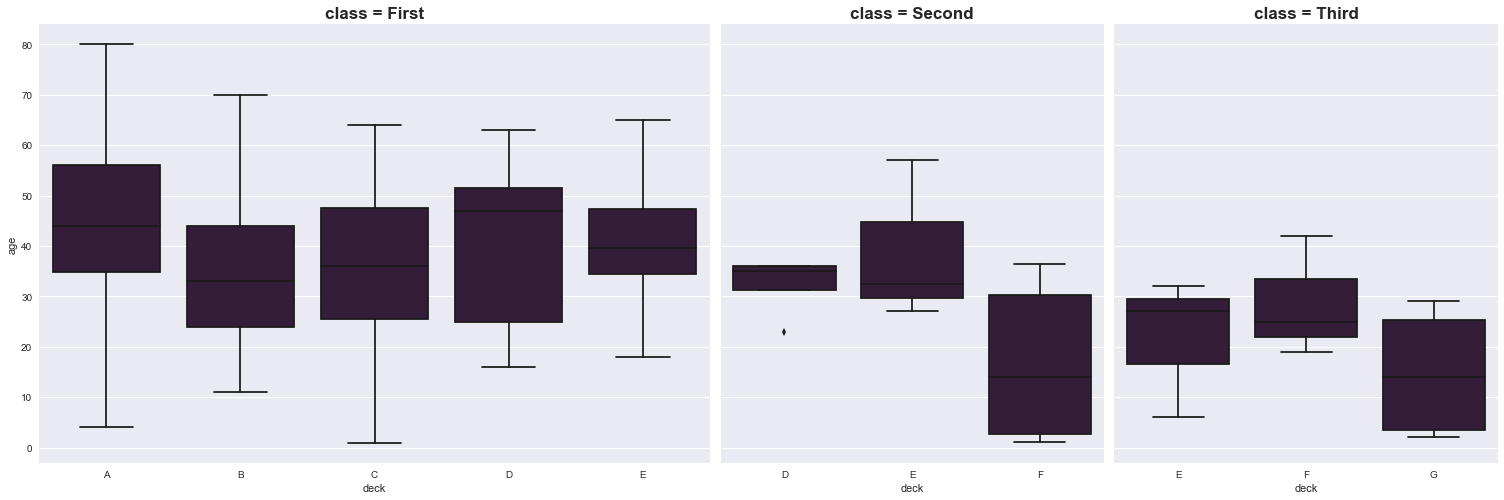

In [45]:
# Loading built-in Titanic Dataset:
titanic = sns.load_dataset("titanic")

# Assigning reformed `deck` column:
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")

# Creating Grid and Plot:
ax = sns.FacetGrid(titanic, col="class", sharex=False, size=7,
                  gridspec_kws={"width_ratios": [3.5, 2, 2]})
ax.map(sns.boxplot, "deck", "age")

ax.set_titles(fontweight='bold', size=17)

Breaking it down, at first we import our built-in Titanic dataset, and then assign a new column, i.e. `deck` using Pandas `.assign()` function. Here we declare this new column as a component of pre-existing `deck` column from Titanic dataset, but as a sorted object. Then we create our *FacetGrid* mentioning the DataFrame, the column on which Grids get segregated but with shared across *Y-axis*; for `chosen deck` against `Age` of passengers. Next in action is our **grid keyword specifications**, where we decide the *width ratio* of the plot that shall be passed on to these grids. Finally, we have our **Box Plot** representing values of `Age` feature across respective decks.

Now let us try to use different axes with same size for multivariate plotting on Tips dataset:

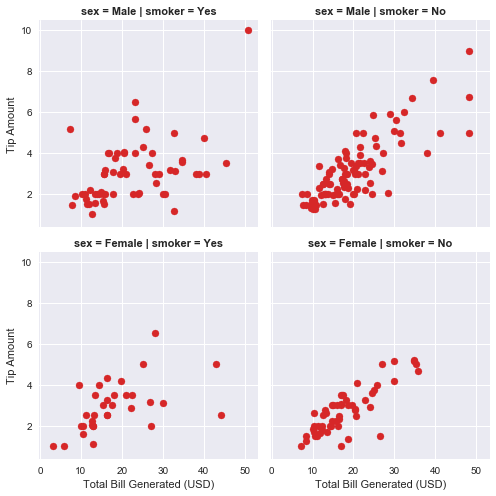

In [42]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

# Mapping a Scatterplot to our FacetGrid:
ax = sns.FacetGrid(tips, col="smoker", row="sex", size=3.5)
ax = (ax.map(plt.scatter, "total_bill", "tip", color=tableau_20[6]).set_axis_labels("Total Bill Generated (USD)", "Tip Amount"))

# Increasing size for subplot Titles & making it appear Bolder:
ax.set_titles(fontweight='bold', size=11)

**Scatterplot** dealing with data that has multiple variables is no new science for us so instead let me highlight what `.map()` does for us. This function actually allows us to project our figure axes, in accordance to which our Scatterplot spreads the feature datapoints across the grids, depending upon the segregators. Here we have `sex` and `smoker` as our segregators (When I use the general term "segregator", it just refers to the columns on which we decide to determine the layout). This comes in really handy as we can pass *Matplotlib parrameters* for further customization of our plot. At the end, when we add `.set_axis_labels()` it gets easy for us to label our axes but please note that this method shall work for you only when you're dealing with grids, hence you didn't observe me adapting to this function, while detailing various other plots.

- Let us now talk about the `football_plot` function we defined earlier with **football** DataFrame. The only reason I didn't speak of it then was because I wanted you to go through a few more parameter implementation before getting into this. There are **3 important rules for defining such functions** that are supported by [FacetGrid.map](http://xarray.pydata.org/en/stable/generated/xarray.plot.FacetGrid.map.html):

   -They must take array-like inputs as positional arguments, with the first argument corresponding to the `X-Axis`, and the second argument corresponding to `y-Axis`.
   -They must also accept two keyword arguments: `color`, and `label`. If you want to use a `hue` variable, than these should get passed to the underlying plotting function (As a side note: You may just catch `**kwargs` and not do anything with them, if it's not relevant to the specific plot you're making.
   -Lastly, when called, they must draw a plot on the "currently active" matplotlib Axes.

- Important to note is that there may be cases where your function draws a plot that looks correct without taking `x`, `y`, positional inputs and then it is better to just call the plot, like: `ax.set_axis_labels("Column_1", "Column_2")` after you use `.map()`, which should rename your axes properly. Alternatively, you may also want to do something like `ax.set(xticklabels=)` to get more meaningful ticks.

- Well I am also quite stoked to mention another important function (though not that comonly used), that is [FacetGrid.map_dataframe()](http://nullege.com/codes/search/axisgrid.FacetGrid.map_dataframe). The rules here are similar to `FacetGrid.map()`, but the function you pass must accept a DataFrame input in a parameter called `data`, and instead of taking *array-like positional* inputs it takes *strings* that correspond to variables in that dataframe. Then on each iteration through the *facets*, the function will be called with the *Input dataframe*, masked to just the values for that combination of `row`, `col`, and `hue` levels.

**Another important to note with both the above-mentioned functions is that the `return` value is ignored so you don't really have to worry about it.** Just for illustration purpose, let us consider drafting a function that just *draws a horizontal line in each `facet` at `y=2` and ignores all the Input data*:

In [7]:
# That is all you require in your function:
def plot_func(x, y, color=None, label=None):
    ax.map(plt.axhline, y=2)

I know this function concept might look little hazy at the moment but once you have covered more on dates and maptplotlib syntax in particular, the picture shall get much more clearer for you.

Let us look at one more example of `FacetGrid()` and this time let us again create a synthetic DataFrame for this demonstration:

In [38]:
# Creating synthetic Data (Don't focus on how it's getting created):
units = np.linspace(0, 50)
A = [1., 18., 40., 100.]

df = []
for i in A:
    V1 = np.sin(i * units)
    V2 = np.cos(i * units)
    df.append(pd.DataFrame({"units": units, "V_1": V1, "V_2": V2, "A": i}))

sample = pd.concat(df, axis=0)

In [41]:
# Previewing DataFrame:
sample.head(10)
sample.describe()

,A,V_1,V_2,units
count,200.000000,200.000000,200.000000,200.000000
mean,39.750000,-0.005356,-0.001868,25.000000
std,37.526373,0.682091,0.734673,14.762329
min,1.000000,-0.997677,-0.999703,0.000000
25%,13.750000,-0.670396,-0.746011,12.244898
50%,29.000000,0.007234,0.063577,25.000000
75%,55.000000,0.651253,0.744281,37.755102
max,100.000000,0.999926,1.000000,50.000000


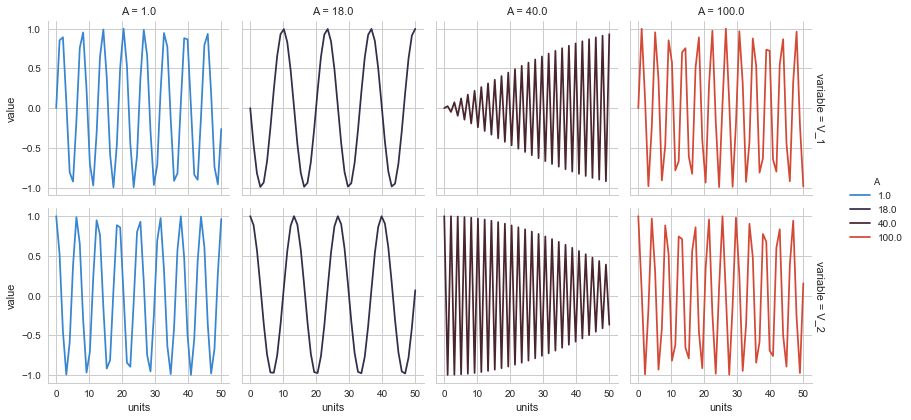

In [47]:
# Melting our sample DataFrame: 
sample_melt = sample.melt(id_vars=['A', 'units'], value_vars=['V_1', 'V_2'])

# Creating plot:
ax = sns.FacetGrid(sample_melt, col='A', hue='A', palette="icefire", row='variable', sharey='row', margin_titles=True)
ax.map(plt.plot, 'units', 'value')
ax.add_legend()

This process shall come in handy if you ever wish to vertically stack rows of subplots on top of one another. You do not really have to focus on the process of creating dataset, as generally you will have your dataset provided with a problem statement. For our plot, yu may just consider these visual variations as [Sinusoidal waves](https://en.wikipedia.org/wiki/Sine_wave). I shall attach a link in our notebook, if you wish to dig deeper into what these are and how are they actually computed. 

Our next lecture would be pretty much a small follow up to this lecture, where we would try to bring more of *Categorical data* to our **FacetGrid()**. Meanwhile, I would again suggest you to play around with analyzing and plotting datasets, as much as you can because visualization is a very important facet of *Data Science & Research*. And, I shall see you in our next lecture.